# Computer Practical 1: Multivariate Normal Distribution

In this first practical we will implement the Multivariate Normal Distribution (MVN).

In order to do this, we require the following packages (use `install.packages()` if the packages are not available):

In [196]:
library(ggplot2)
library(reshape2)

options(repr.plot.width = 3, repr.plot.height = 2.5) 


By "implementing" the Multivariate Normal Distribution, I mean completing the following tasks:

1. Implement the density function of the MVN as an `R` function.
2. Implement an `R` function that samples from an MVN.
3. Implement an `R` function that computes the conditional MVN distribution.

These functions will be the foundation for all our future implementations of Gaussian processes that we will write in the coming weeks.

Before doing this, we will first go over a brief review of the syntax of `R`. Feel free to skip this section if you are comfortable with the basics.

## Review of `R`

### Variables

You can define `R` variables using either `<-` or `=`. For example:

In [ ]:
x = 2
y <- 3

### Vectors and Matrices

There are numerous ways to define a vector. For example:

In [ ]:
x = c(1,2,3,4) # c stands for concatenation
y = seq(0, 10, length.out=11) # defines a sequence of 11 equidistant points from 0 to 10

Matrices will be used often in this course. There are numerous ways to define matrices. 

One of the easiest ways is to start with a vector and then turn it into a matrix:

In [2]:
vector = c(1,2,3,4,5,6)
matrix = matrix(vector, nrow = 2, byrow = TRUE)
matrix

1,2,3
4,5,6


In [3]:
matrix = matrix(vector, nrow = 2, byrow = FALSE)
matrix

1,3,5
2,4,6


You can also define matrices using ``rbind`` and ``cbind``. These functions bind vectors together either by row or column:

In [3]:
vec1 = c(1,2,3)
vec2 = c(4,5,6)

matrix = rbind(vec1, vec2)
matrix

vec1,1,2,3
vec2,4,5,6


In [4]:
vec1 = c(1,2,3)
vec2 = c(4,5,6)

matrix = cbind(vec1, vec2)
matrix

vec1,vec2
1,4
2,5
3,6


### `R` functions

To define an `R` function we use the keywork `function` followed by defining the variables (e.g. `function(x)`) used in the function and then we enclose the logic of the function in curly braces `{}`. We use the `return` function if we want to return a value from the function.

For example:

In [4]:
func = function(x) {
    return(x ** 2)
}

func(3)

[1] 9

If our `R` function involves certain operations (e.g. arithmetic, math functions, logical operations) then the function will typically be *vectorisable*. This means the function will automatically apply to each element of a vector or matrix. For example `func` vectorises:

In [5]:
func(c(1,2,3))

[1] 1 4 9

Vectorisation is useful since it speeds up operations and we don't have to use for-loops.

We can create functions with multiple arguments in the obvious way:

In [7]:
func1 = function(x, y) {
    return(x ** 2 + y ** 2)
}

func1(1,4)

[1] 17

We can also create functions with default arguments. This means if no argument is provided, the function will automatically use the provided default value. 

In [8]:
func2 = function(x, y=2) {
    return(x + y)
}

func2(1)

[1] 3

### Loops

There are two types of loops in ``R``:

1. For loops: loops through each element of a vector or list
2. While loops: loops until condition becomes ``FALSE``

The syntax is as follows:

In [2]:
fruits = list("apple", "banana", "cherry") 

for (x in fruits) {
  print(x)
}

[1] "apple"
[1] "banana"
[1] "cherry"


While loops are potentially dangerous because they may not terminate e.g. ``while(TRUE)`` would loop for ever.

In [5]:
i = 1
while (i < 6) {
    print(i)
    i = i+1
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


### Using `ggplot` 

All of the plotting in this course will use the library `ggplot`. This is because it looks nicer and offers greater flexibility than the built-in plotting library of `R`.

If you are unfamiliar with `ggplot` then feel free to use the base plotting functionalities of `R`. However, many examples of `ggplot` will be provided and you hopefully will be able to adapt them to your own needs.

## Task 1: Multivariate Normal Density

The first task is to implement an `R` function which computes the density function of an MVN. 

Recall from the notes that the density of a MVN distributed random variable $\underline{X} \sim \mathcal{N}(\underline{\mu}, \mathrm{K})$ with mean vector $\underline{\mu}$ and covariance matrix $\mathrm{K}$ is:

$$ p_{\underline{X}}(\underline{x}; \underline{\mu}, \mathrm{K}) =  \frac{1}{\sqrt{|\mathrm{K}|}}(2\pi)^{-n/2} \exp\left(-\frac{1}{2} (\underline{x} -\underline{\mu})^\top \mathrm{K}^{-1} (\underline{x}-\underline{\mu})\right).$$

Here, $n$ is the dimension of random variable.

We always implement log-densities instead:

$$ \log p_{\underline{X}}(\underline{x}; \underline{\mu}, \mathrm{K}) =  -\frac{1}{2}\log|\mathrm{K}|-\frac{n}{2}\log(2\pi)-\frac{1}{2} (\underline{x} -\underline{\mu})^\top \mathrm{K}^{-1} (\underline{x}-\underline{\mu}).$$

#### Task: Implement a function that computes the log-density of a MVN.

The following functions may be useful (depending on how you approach it):

1. ``det()`` - computes the determinant of a matrix
2. ``solve()`` - computes the inverse of a matrix
3. ``%*%`` - multiplies two matrices together (e.g  ``A %*% B``)
4. ``t()`` - computes the transpose of a matrix

In [100]:
dmvnorm = function(x, mean, covariance) {
    log_det_cov = log(det(covariance))
    inv_cov = solve(covariance)
    n = length(mean)
    quad_form = (x - mean) %*% inv_cov %*% (x-mean)

    return(-0.5 * log_det_cov - 0.5 * n * log(2 * pi) - 0.5 * quad_form)
}


# the following function is much faster than using apply on the above function
# this will be the mvn density function that we will use throughout the practicals

dmvn = function(x, mean, covariance) { 
    if (is.vector(x)) {
        x = matrix(x, ncol = length(x))
    }
    n = ncol(x)

    cholesky = chol(covariance)
    solved_cholesky = backsolve(cholesky, t(x) - mean, transpose = TRUE)
    quad_form = colSums(solved_cholesky ** 2)
    output = -sum(log(diag(cholesky))) - 0.5 * n * log(2 * pi) - 0.5 * quad_form
    names(output) = rownames(x)
    return(output)
}

If your code is working correctly, it should output the following:

In [191]:
dmvn(c(1,2), mean=c(1,4), covariance = rbind(c(3,1),c(1,3)))

-3.627598


In order to vectorise your code, you may want to use ``apply``.

This allows you to compute multiple density evaluations in one call.

In [193]:
x_matrix = rbind(c(1,2), c(2,5), c(5,6))

apply(x_matrix, 1, dmvn, mean=c(1,4), covariance = rbind(c(3,1),c(1,3)))

[1] -3.627598 -3.127598 -5.627598

## Task 2: Sampling from the MVN

The second task is to implement an `R` function which samples from the MVN with given mean vector $\underline{\mu}$ and covariance matrix $\mathrm{K}$.

This will happen in two steps:

1. Sample from the standard multivariate normal distribution. $$\underline{Z}\sim\mathcal{N}(\underline{0}, I_n). $$
2. Sample from the MVN with mean vector $\underline{\mu}$ and covariance matrix $\mathrm{K}$ using the affine transformation: $$ \underline{X} =  \mathrm{A} \underline{Z} + \underline{\mu}.$$ Here, $\mathrm{A}$ is a matrix satisfying $\mathrm{A}\mathrm{A}^\top = \mathrm{K}$.

#### Task: Implement a function that samples from a MVN 

The following functions will be useful (depending on your approach):

1. `chol()` - computes the Cholesky decomposition of a covariance matrix $\mathrm{K} = \mathrm{B}\mathrm{B}^\top$. Returns $\mathrm{B}^\top$.
2. `%*%` - matrix multiplication
3. `rmvn()` - samples from $\mathcal{N}(0,1)$ distribution

In [84]:
rmvn = function(N, mean, covariance) {
    # N is number of samples to compute
    # mean is mean vector
    # covariance is covariance matrix

    n = length(mean) #dimension of random vector

    standard_normal_sample = rnorm(n * N)
    standard_mvn_sample = matrix(standard_normal_sample, nrow = N)

    cholesky = chol(covariance)

    output = t(cholesky) %*% t(standard_mvn_sample) + mean

    return(t(output))

}

If your code is working, the following code should produce a similar plot:

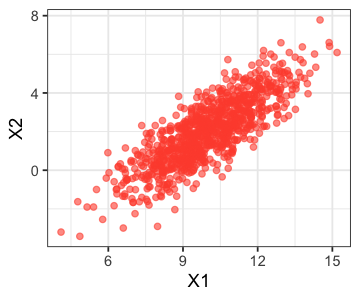

In [126]:
sample = rmvn(900, c(10,2), rbind(c(3,2.5),c(2.5,3)))

data = data.frame(sample)

ggplot(data, aes(x=X1, y=X2)) + geom_point(col='#ff523be8', alpha=0.6) +
                theme_bw()


In higher dimensions:

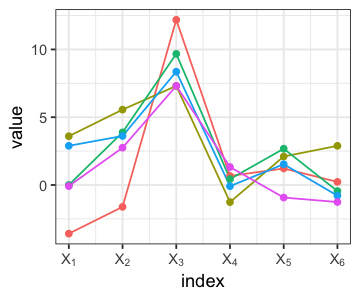

In [145]:
A = matrix(rnorm(36), nrow=6)
K = A %*% t(A) # I am randomly generating a covariance matrix here...

mu = c(3,4,10,0,0,0)

sample = rmvn(5, mu, K)

index = c(1,2,3,4,5,6)
label = c(expression(X[1]),expression(X[2]),expression(X[3]), expression(X[4]),expression(X[5]),expression(X[6]))

gp_samples_df <- melt(data.frame(index, t(sample)), id = "index")

gp_sample_plot <- ggplot(gp_samples_df) +
                geom_line(aes(x = index, y = value, group = variable, color=variable), show.legend = FALSE) +
                geom_point(aes(x = index, y = value, group = variable, color=variable),show.legend = FALSE) + 
                theme_bw() + scale_x_continuous(breaks=seq(1,6,1), labels= label)

gp_sample_plot


## Task 3: Conditional Distribution

Our final task is to implement the conditional distribution:

Let $\underline{X} \sim \mathcal{N}(\underline{\mu}, \mathrm{K})$.  Suppose we partition $\underline{X}$ into
$$    \underline{X} = \begin{pmatrix} \underline{X}_1 \\ \underline{X}_2 \end{pmatrix}.$$
Let $\underline{\mu}_1 = \text{E}[\underline{X}_1]$, $\underline{\mu}_2 = \text{E}[\underline{X}_2]$, $\mathrm{K}_{11} = \text{Cov}[\underline{X}_1,\underline{X}_1]$, $\mathrm{K}_{12} = \text{Cov}[\underline{X}_1,\underline{X}_2]$, $\mathrm{K}_{21} = \text{Cov}[\underline{X}_2,\underline{X}_1]$ and $\mathrm{K}_{22} = \text{Cov}[\underline{X}_2,\underline{X}_2]$. Then,
$$
    \underline{X}_1 \,|\, \underline{X}_2 = \underline{a} \sim \mathcal{N}(\underline{\tilde{\mu}}, \tilde{\mathrm{K}}),
$$
where
$$ \underline{\tilde{\mu}} = \underline{\mu_1} + \mathrm{K}_{12} \mathrm{K}_{22}^{-1} (\underline{a} - \underline{\mu_2}), $$
$$ \tilde{\mathrm{K}} = \mathrm{K}_{11} - \mathrm{K}_{12} \mathrm{K}_{22}^{-1}\mathrm{K}_{21} .$$

#### Task: Implement a function that returns the posterior mean and covariance matrix $\underline{\tilde{\mu}}$ and $\tilde{\mathrm{K}}$.

The following functions may be useful:

1. ``solve()`` - computes the inverse of a matrix
2. ``%*%`` - multiplies two matrices together (e.g  ``A %*% B``)
3. ``t()`` - computes the transpose of a matrix


In [214]:
condmvn = function(a, mu1, mu2, K11, K12, K22) {
    # a is vector we are conditioning upon
    # mu1 is the mean of X_1
    # mu2 is the mean of X_2
    # K11 is covariance matrix of X_1
    # K12 is cross-covariance matrix of X1 and X2
    # K22 is covariance matrix of X_2

    inv_K22 = solve(K22)

    tilde_mu = mu1 + K12 %*% inv_K22 %*% (a - mu2)
    tilde_K = K11 - K12 %*% inv_K22 %*% t(K12)

    output = list('cond_mean' = as.vector(tilde_mu), 'cond_covariance' = tilde_K)

    return(output)
}

If your code is working, your output should look like:

In [295]:
a = c(1,2) 
mu1 = c(5,-2)
mu2 = c(0,0)

set.seed(124) # fixing random seed so rnorm will sample same values
A = matrix(rnorm(16, sd = 1), nrow=4)
K = A %*% t(A) 

K11 = K[1:2,1:2]
K12 = K[1:2,3:4]
K22 = K[3:4,3:4]

condmvn(a, mu1, mu2, K11, K12, K22)


2.100552,-1.155652
-1.155652,1.024107


The above code computed the conditional distribution:

$$ (X_1, X_2)^\top | X_3 = 1, X_4 = 2.$$

We can visualise this as follows:

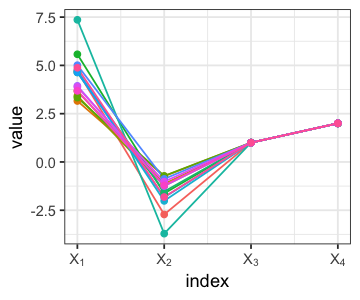

In [296]:
cond_output = condmvn(a, mu1, mu2, K11, K12, K22) # this is a list

cond_mean = cond_output$cond_mean 
cond_covariance = cond_output$cond_covariance

N = 15 # number of samples
sample = cbind( rmvn(N, cond_mean, cond_covariance),t(replicate(N,a)))

index = c(1,2,3,4)
label = c(expression(X[1]),expression(X[2]),expression(X[3]), expression(X[4]))

gp_samples_df <- melt(data.frame(index, t(sample)), id = "index")

gp_sample_plot <- ggplot(gp_samples_df) +
                geom_line(aes(x = index, y = value, group = variable, color=variable), show.legend = FALSE) +
                geom_point(aes(x = index, y = value, group = variable, color=variable),show.legend = FALSE) + 
                theme_bw() + scale_x_continuous(breaks=seq(1,4,1), labels= label)

gp_sample_plot
